# **Facial Recocnition APP**

In [15]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np   

In [16]:
import torch
from torch import nn  

In [17]:
from facenet_pytorch import MTCNN

(-0.5, 443.5, 630.5, -0.5)

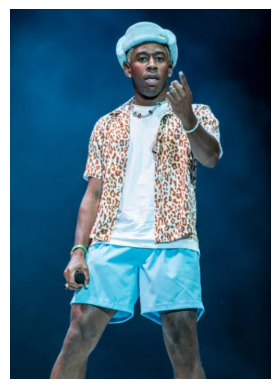

In [19]:
pth = 'media/image.png'
image = cv2.imread(pth) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

plt.Figure((15,15))
plt.imshow(image)
plt.axis(False)

In [20]:
detector = MTCNN() 
box, prob = detector.detect(image) 
box.squeeze()

array([205.8733673095703, 57.35151672363281, 268.33831787109375,
       141.515380859375], dtype=object)

In [21]:
x1, y1, x2, y2 = int(box[0][0]) , int(box[0][1]) ,int(box[0][2]) ,int(box[0][3]) 
image = cv2.rectangle(image , (x1, y1), (x2, y2) , (255, 0 , 0), thickness=4) 

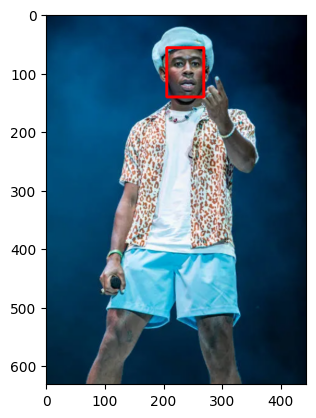

In [22]:
plt.Figure((15, 15))
plt.imshow(image)

In [23]:
newVid = 'media/cafe.mp4' 

In [24]:
cam = cv2.VideoCapture(newVid) 

# Initialize MTCNN detector
detector = MTCNN()

while True:
    ret, frame = cam.read()
    if ret:
        boxes, probs = detector.detect(frame)
        if boxes is not None: 
          # Plot insivisual Faces in the FRAME: 
            for box, prob in zip(boxes, probs):
                # Extract box coordinates and convert to integers
                x1, y1, x2, y2 = [int(coord) for coord in box]
                frame = cv2.rectangle(frame, 
                                      (x1, y1), 
                                      (x2, y2), 
                                      (0, 255, 0), 
                                      5)
                frame = cv2.putText(frame, 
                                    text=f"{prob:.2f}",  
                                    org=(x1, y1 - 10),  
                                    fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                                    fontScale=1,  
                                    color=(0, 255, 255), 
                                    thickness=2)

        # Show the frame
        cv2.imshow('frame', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print(f"Exited without any Errors!!!")
        break

# Release camera and destroy all windows
cam.release()
cv2.destroyAllWindows()

Exited without any Errors!!!


In [25]:
cam.release() 
cv2.destroyAllWindows() 

# next step imma do gender prediction feature.... 


In [26]:
gender_arci = "modelWeights/deploy_gender.protext" 
gender_weights = "modelWeights/gender_net.caffemodel" 

age_arci = "modelWeights/deploy_age.protext" 
age_weights = "modelWeights/age_net.caffemodel" 


In [27]:
cam = cv2.VideoCapture(1) 

# Initialize MTCNN detector
detector = MTCNN()

genderDetector  = cv2.dnn.readNetFromCaffe(
    gender_arci,  # Pretriained Model 
    gender_weights  # Pretrained Weights 
)

ageDetector  = cv2.dnn.readNetFromCaffe(
    age_arci,  # Pretriained Model 
    age_weights  # Pretrained Weights 
)

genders = ["male", "female"] 
age = ["0-2", "4-6", "8-12", "15-20", "25-32", "38-43", "48-53", "60-100"]

while True:
    ret, frame = cam.read()
    if ret:
        boxes, probs = detector.detect(frame)
        if boxes is not None: 
          # Plot insivisual Faces in the FRAME: 
            for box, prob in zip(boxes, probs):
                # Extract box coordinates and convert to integers
                
                x1, y1, x2, y2 = [int(coord) for coord in box]
                
                face = frame[max(0, y1):max(0, y2), max(0, x1):max(0, x2)] 
                if face.size == 0:  # Handle cases where the face region is invalid
                    continue
                blob = cv2.dnn.blobFromImage(face, 
                                             scalefactor=1.0, 
                                             size=(227, 227),  # Input size for the model
                                             mean=(78.4263377603, 87.7689143744, 114.895847746),  # Mean subtraction
                                             swapRB=False, 
                                             crop=False)
                
                # making predictions 
                genderDetector.setInput(blob) 
                Gpreds = genderDetector.forward()
                gender = genders[np.argmax(Gpreds)]   
                
                # Age Predictions 
                ageDetector.setInput(blob) 
                Apreds = ageDetector.forward()
                ageFinal = age[np.argmax(Apreds)]   
                
                frame = cv2.rectangle(frame, 
                                      (x1, y1), 
                                      (x2, y2), 
                                      (0, 255, 0), 
                                      5)
                
                # for the face detections 
                frame = cv2.putText(frame, 
                                    text=f"{gender} | {ageFinal}",   
                                    org=(x1, y1 - 10),  
                                    fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                                    fontScale=1,  
                                    color=(255, 255, 255), 
                                    thickness=2)

        # Show the frame
        cv2.imshow('frame', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print(f"Exited without any Errors!!!")
        break

# Release camera and destroy all windows
cam.release()
cv2.destroyAllWindows()

Exited without any Errors!!!


In [28]:
cam.release()
cv2.destroyAllWindows()

### **THE END**